<a href="https://colab.research.google.com/github/starkjiang/TrAC-Interpretability/blob/main/m1_iia_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost Model with Scikit-learn

In this tutorial, we will have a quick glimpse on how one of most popular ML models, i.e., XGBoost, performs over different tasks, including regression and classification. We will also see how the hyperparameters affect the performance and the relationship between the features and the output.

In [ ]:
!pip install --upgrade xgboost

In [ ]:
import numpy as np
import xgboost as xgb

from scipy.stats import uniform, randint

from sklearn.datasets import (
    load_breast_cancer,
    load_diabetes,
    load_wine,
)
from sklearn.metrics import (
    auc,
    accuracy_score,
    confusion_matrix,
    mean_squared_error,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    KFold,
    RandomizedSearchCV,
    train_test_split,
)

In [ ]:
# Define two helper functions.
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Regression

In [ ]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print(np.sqrt(mse))

0.39512221537109155


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:45:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

# Binary Classification

In [ ]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[212   0]
 [  0 357]]


# Multiclass classification

In [ ]:
wine = load_wine()

X = wine.data
y = wine.target

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


# Cross-validation

In [ ]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:linear")
    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_test)

    scores.append(mean_squared_error(y_test, y_pred))

display_scores(np.sqrt(scores))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:14] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:15] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:

Scores: [57.8878367  58.38510758 68.69963127 65.94107893 64.05194017]
Mean: 62.993
Std: 4.235


In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

scores = cross_val_score(
    xgb_model,
    X,
    y,
    scoring="neg_mean_squared_error",
    cv=5
)

display_scores(np.sqrt(-scores))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:48] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Scores: [55.68547317 58.18498778 68.622534   64.15281814 68.4826639 ]
Mean: 63.026
Std: 5.286


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:47:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Hyperparameter Searching

In [ ]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(
    xgb_model,
    param_distributions=params,
    random_state=42,
    n_iter=200,
    cv=3,
    verbose=1,
    n_jobs=1,
    return_train_score=True
)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 0.471 (std: 0.019)
Parameters: {'colsample_bytree': 0.7902634929450308, 'gamma': 0.1424202471887338, 'learning_rate': 0.041066084206359835, 'max_depth': 2, 'n_estimators': 101, 'subsample': 0.8010716092915446}



# Early Stopping

In [ ]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

# If more than one evaluation metric are given the last one is used for early
# stopping.
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    eval_metric="auc",
    early_stopping_rounds=5
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred)

[0]	validation_0-auc:0.96286
[1]	validation_0-auc:0.97742
[2]	validation_0-auc:0.97514
[3]	validation_0-auc:0.98096
[4]	validation_0-auc:0.98637
[5]	validation_0-auc:0.99043
[6]	validation_0-auc:0.98918
[7]	validation_0-auc:0.98980
[8]	validation_0-auc:0.98939
[9]	validation_0-auc:0.99251
[10]	validation_0-auc:0.99209
[11]	validation_0-auc:0.99168
[12]	validation_0-auc:0.99313
[13]	validation_0-auc:0.99313
[14]	validation_0-auc:0.99355
[15]	validation_0-auc:0.99313
[16]	validation_0-auc:0.99272
[17]	validation_0-auc:0.99272
[18]	validation_0-auc:0.99293


0.965034965034965

In [ ]:
print("best score: {0}, best iteration: {1}".format(xgb_model.best_score, xgb_model.best_iteration))
print("best ntree limit: {0}".format(xgb_model.best_ntree_limit))

best score: 0.9935497295047857, best iteration: 14


AttributeError: 'XGBClassifier' object has no attribute 'best_ntree_limit'

# Evaluation

In [ ]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=20,
    random_state=42,
    eval_metric=["auc", "error", "error@0.6"]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

[0]	validation_0-auc:0.96286	validation_0-error:0.06993	validation_0-error@0.6:0.06294
[1]	validation_0-auc:0.97742	validation_0-error:0.03497	validation_0-error@0.6:0.03497
[2]	validation_0-auc:0.97514	validation_0-error:0.04196	validation_0-error@0.6:0.04196
[3]	validation_0-auc:0.98096	validation_0-error:0.03497	validation_0-error@0.6:0.04196
[4]	validation_0-auc:0.98637	validation_0-error:0.03497	validation_0-error@0.6:0.04196
[5]	validation_0-auc:0.99043	validation_0-error:0.03497	validation_0-error@0.6:0.03497
[6]	validation_0-auc:0.98918	validation_0-error:0.03497	validation_0-error@0.6:0.03497
[7]	validation_0-auc:0.98980	validation_0-error:0.03497	validation_0-error@0.6:0.03497
[8]	validation_0-auc:0.98939	validation_0-error:0.03497	validation_0-error@0.6:0.03497
[9]	validation_0-auc:0.99251	validation_0-error:0.03497	validation_0-error@0.6:0.03497
[10]	validation_0-auc:0.99209	validation_0-error:0.03497	validation_0-error@0.6:0.04196
[11]	validation_0-auc:0.99168	validation_0

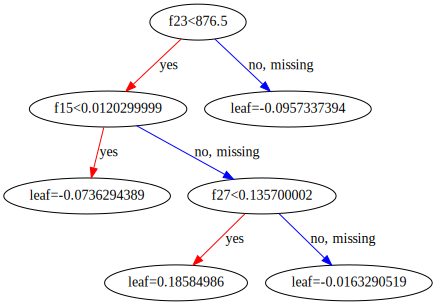

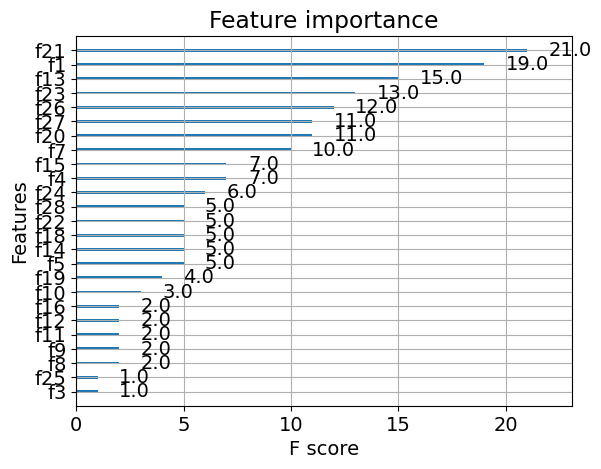

In [ ]:
# requires graphviz and python-graphviz conda packages
import graphviz

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    eval_metric="auc",
    early_stopping_rounds=10
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the
# target tree xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)